In [ ]:
library('clusterProfiler')


ERROR: Error in library(org.Hs.eg.db): there is no package called ‘org.Hs.eg.db’


In [10]:
library(org.Mm.eg.db)


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: IRanges

Loading required package: S4Vect

In [4]:
df.deg <- read.csv("/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_wilcoxon.csv")

In [15]:
head(df.deg)

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,ctname,region,condition,gene_name,gene_id,gstart,gend,strand,distance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,chr2:98666917-98667418,23.533844,0.9004145,1.837545e-122,2.519275e-116,0.9574536,0.8823978,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,0
2,chr2:98662045-98662546,19.915870,0.9123986,2.964556e-88,2.032203e-82,0.7962252,0.6446533,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,0
3,chr2:98666414-98666915,18.153790,0.7490824,1.198400e-73,5.476689e-68,0.8691619,0.7602235,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,0
4,chr9:35305176-35305677,13.207377,0.7783439,7.954764e-40,2.726495e-34,0.5758157,0.4462789,PFC_GABA,PFC,MC,Gm33838,ENSMUSG00000111059.1,35301721,35307599,-,0
5,chr2:98662628-98663129,11.916548,0.7575722,9.704762e-33,2.661046e-27,0.5201536,0.3916688,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,0
6,chr9:3001884-3002385,8.819262,0.9723987,1.152170e-18,2.632707e-13,0.3000640,0.1894844,PFC_GABA,PFC,MC,Gm10722,ENSMUSG00000091028.1,3000921,3002330,+,0


In [42]:
# 获取所有唯一的ct_name和condition组合
ct.names <- c("AMY_Glut", "AMY_GABA", "HIP_Glut", "HIP_GABA", "PFC_Glut", "PFC_GABA")
conditions <- c("MC", "MW")
subset_df <- subset(df.deg, ctname == "AMY_Glut" & condition == "MC")


In [35]:
# 转换ID（Symbol → Entrez）
gene_entrez <- bitr(unique(subset_df$gene_name), 
                    fromType = "SYMBOL", 
                    toType = "ENTREZID", 
                    OrgDb = "org.Mm.eg.db")
entrez_ids <- gene_entrez$ENTREZID

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(subset_df$gene_name), fromType = "SYMBOL", toType = "ENTREZID", :
“6.91% of input gene IDs are fail to map...”


In [36]:
ego <- enrichGO(gene = entrez_ids,
                OrgDb = org.Mm.eg.db,
                keyType = "ENTREZID",
                ont = "ALL",  # "BP", "MF", "CC" 或 "ALL"
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05,
                readable = TRUE)  # 结果中显示基因符号

# 查看结果
head(ego)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:1905168,BP,GO:1905168,positive regulation of double-strand break repair via homologous recombination,6/244,43/28928,0.13953488,16.542890,9.407117,1.589769e-06,0.004513355,0.003979444,Prmt1/Ruvbl2/Ep400/Mrnip/Hdgfl2/Actl6a,6
GO:0051054,BP,GO:0051054,positive regulation of DNA metabolic process,12/244,312/28928,0.03846154,4.559899,5.830923,1.531085e-05,0.021733758,0.019162743,Prmt1/Gsk3b/Ruvbl2/Ep400/Mrnip/Hmbox1/Arrb2/Hdgfl2/Prkd2/Actl6a/Fam168a/Kat7,12
GO:0045862,BP,GO:0045862,positive regulation of proteolysis,12/244,339/28928,0.03539823,4.196721,5.460494,3.454894e-05,0.029799541,0.026274377,Gsk3b/Hip1/Myh9/Ripk2/Traf7/Oaz1/Nub1/Hspbp1/Aph1c/Axin1/Stat3/Ddrgk1,12
GO:0045911,BP,GO:0045911,positive regulation of DNA recombination,6/244,78/28928,0.07692308,9.119798,6.622872,5.236809e-05,0.029799541,0.026274377,Prmt1/Ruvbl2/Ep400/Mrnip/Hdgfl2/Actl6a,6
GO:0010569,BP,GO:0010569,regulation of double-strand break repair via homologous recombination,6/244,81/28928,0.07407407,8.782028,6.468621,6.479114e-05,0.029799541,0.026274377,Prmt1/Ruvbl2/Ep400/Mrnip/Hdgfl2/Actl6a,6
GO:0030518,BP,GO:0030518,nuclear receptor-mediated steroid hormone signaling pathway,7/244,122/28928,0.05737705,6.802472,5.923498,8.194384e-05,0.029799541,0.026274377,Esrra/Calcoco1/Carm1/Per1/Cry2/Ddrgk1/Trerf1,7


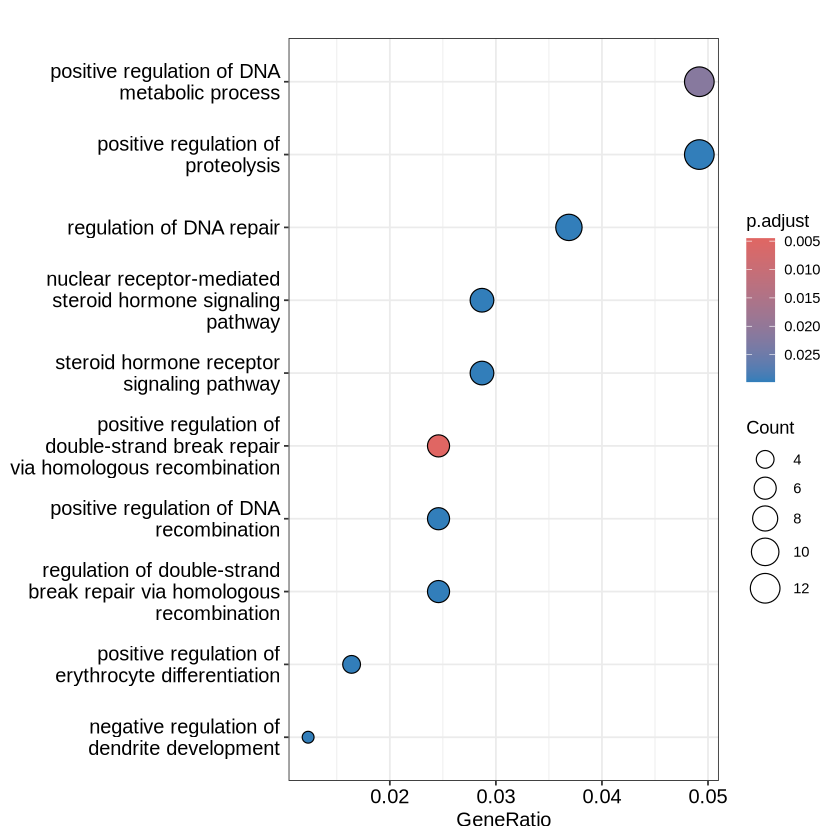

In [41]:
dotplot(ego, showCategory = 10)  # 气泡图

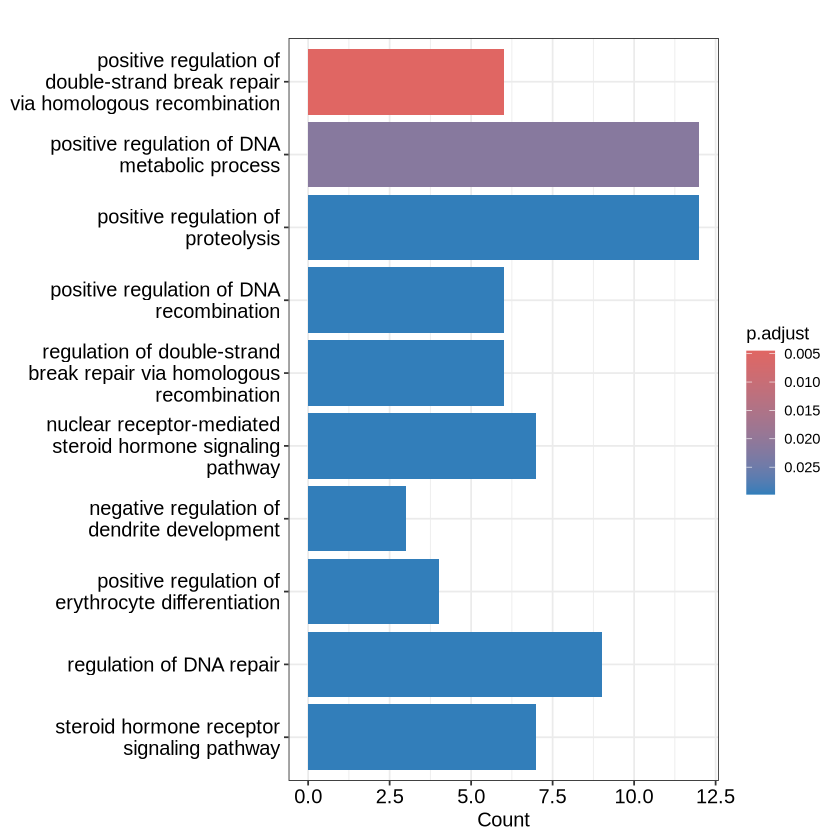

In [38]:
barplot(ego, showCategory = 10)  # 条形图
